In [203]:
import numpy as np
# 訓練データと検証データの分割
from sklearn.model_selection import train_test_split
# データを扱う
import pandas as pd
# グラフ描画
from matplotlib import pyplot as plt
%matplotlib inline
# seabornライブラリをsnsという省略名でインポート
import seaborn as sns

## 訓練データの読み込み

In [204]:
# CSVファイル読み込み（訓練データ）
df_train = pd.read_csv('train.csv')
df_train.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,59,Male,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0
1,69,Male,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1
2,65,Male,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0
3,65,Male,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1
4,22,Female,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0


In [205]:
# 性別を変換する（訓練データ）
df=df_train
gemder=pd.get_dummies(df.loc[:,['Gender']])
df['Age0']=gemder.loc[:,['Gender_Female']]
df['Age1']=gemder.loc[:,['Gender_Male']]
df = df.astype({'Age0': 'int32', 'Age1': 'int32'})
df.drop(columns=['Gender'],inplace=True)
df.head()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease,Age0,Age1
0,59,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0,0,1
1,69,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1,0,1
2,65,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0,0,1
3,65,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1,0,1
4,22,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0,1,0


In [206]:
#　性別と結果は数値でないため、除外する（分析用）
col_categoric = ["Gender", "disease"]
df_numeric = df_train.drop(col_categoric, axis=1)
df_categoric = df_train[col_categoric]

## 解析する

In [207]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       850 non-null    int64  
 1   Gender    850 non-null    object 
 2   T_Bil     850 non-null    float64
 3   D_Bil     850 non-null    float64
 4   ALP       850 non-null    float64
 5   ALT_GPT   850 non-null    float64
 6   AST_GOT   850 non-null    float64
 7   TP        850 non-null    float64
 8   Alb       850 non-null    float64
 9   AG_ratio  850 non-null    float64
 10  disease   850 non-null    int64  
 11  Age0      850 non-null    uint8  
 12  Age1      850 non-null    uint8  
dtypes: float64(8), int64(2), object(1), uint8(2)
memory usage: 74.8+ KB


In [208]:
# 項目毎にNULLであればTrueと表示する
df_train.isnull()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease,Age0,Age1
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,False,False,False,False,False,False,False,False,False,False,False,False,False
846,False,False,False,False,False,False,False,False,False,False,False,False,False
847,False,False,False,False,False,False,False,False,False,False,False,False,False
848,False,False,False,False,False,False,False,False,False,False,False,False,False


In [209]:
#nullのある項目について、数量を集計する
df_train.isnull().sum()

Age         0
Gender      0
T_Bil       0
D_Bil       0
ALP         0
ALT_GPT     0
AST_GOT     0
TP          0
Alb         0
AG_ratio    0
disease     0
Age0        0
Age1        0
dtype: int64

In [210]:
# 行毎にnull値が存在するか確認する
df_train.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
845    False
846    False
847    False
848    False
849    False
Length: 850, dtype: bool

In [211]:
# nullのある行数
df_train.duplicated().sum()

0

In [212]:
df_train.describe()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease,Age0,Age1
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,46.610588,1.607337,0.606737,272.211316,41.978476,61.018120,7.032290,3.517458,1.144570,0.444706,0.174118,0.825882
std,16.453672,2.443585,1.569032,200.348515,145.927366,110.125390,0.840664,0.559942,0.227237,0.497226,0.379434,0.379434
min,10.000000,0.585961,0.034861,163.261838,3.924518,11.283497,4.858679,2.180884,0.627133,0.000000,0.000000,0.000000
25%,32.000000,0.781258,0.144889,213.991414,13.644658,21.239157,6.730612,3.139153,1.004466,0.000000,0.000000,1.000000
50%,48.000000,0.835591,0.194085,220.092503,16.638001,27.056026,6.915580,3.621339,1.205016,0.000000,0.000000,1.000000
75%,62.000000,1.196759,0.335447,229.455927,23.056081,56.461568,7.536151,3.712524,1.287880,1.000000,0.000000,1.000000
max,78.000000,23.017027,17.692164,2108.483728,1423.186473,814.439397,8.739000,5.016970,1.821496,1.000000,1.000000,1.000000


In [213]:
n_data = df_train.loc[df_hist['disease']==0,:]         # non
d_data = df_train.loc[df_hist['disease']==1,:]         # disease

In [214]:
n_data.describe()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease,Age0,Age1
count,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.0,472.000000,472.000000
mean,46.254237,0.825693,0.210563,234.232684,15.975088,29.849293,7.087753,3.605900,1.207145,0.0,0.209746,0.790254
std,16.304396,0.176583,0.553654,67.266382,8.397985,28.303190,0.861106,0.556395,0.200756,0.0,0.407559,0.407559
min,10.000000,0.585961,0.034861,163.261838,3.924518,11.283497,4.858679,2.295068,0.732968,0.0,0.000000,0.000000
25%,32.000000,0.746191,0.120786,211.830825,12.533705,20.259545,6.714659,3.165267,1.029563,0.0,0.000000,1.000000
50%,48.000000,0.797032,0.166680,215.761897,14.825259,22.265808,7.350960,3.630840,1.280918,0.0,0.000000,1.000000
75%,61.000000,0.836842,0.201156,221.424607,17.028880,27.981309,7.538761,4.067706,1.294483,0.0,0.000000,1.000000
max,78.000000,1.734959,11.935322,657.616053,116.407037,481.935324,8.733841,5.016970,1.821496,0.0,1.000000,1.000000


In [215]:
d_data.describe()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease,Age0,Age1
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.0,378.000000,378.000000
mean,47.055556,2.583358,1.101431,319.634370,74.448314,99.937924,6.963035,3.407023,1.066434,1.0,0.129630,0.870370
std,16.649120,3.418749,2.172383,284.042393,214.391912,153.542670,0.810228,0.545244,0.234328,0.0,0.336341,0.336341
min,16.000000,0.642805,0.074207,185.491189,8.570383,11.601122,4.971703,2.180884,0.627133,1.0,0.000000,0.000000
25%,32.000000,0.857066,0.187951,220.623552,17.188434,27.864092,6.750529,3.126030,0.968234,1.0,0.000000,1.000000
50%,48.000000,1.204637,0.277124,227.268717,22.228160,56.648308,6.894533,3.219547,1.017616,1.0,0.000000,1.000000
75%,64.000000,1.940341,0.788026,238.110473,33.368001,67.604461,7.510301,3.690715,1.250521,1.0,0.000000,1.000000
max,75.000000,23.017027,17.692164,2108.483728,1423.186473,814.439397,8.739000,5.014720,1.813936,1.0,1.000000,1.000000


In [217]:
# 重複レコードがあれば削除する
# df_train.drop_duplicates(inplace=True)
# インデックスを採番しなおす
# df.reset_index(drop=True, inplace=True)

In [218]:
df_desc = df_train.describe()
print(df_desc.loc['25%','T_Bil'])

0.7812584352498221


# データの可視化

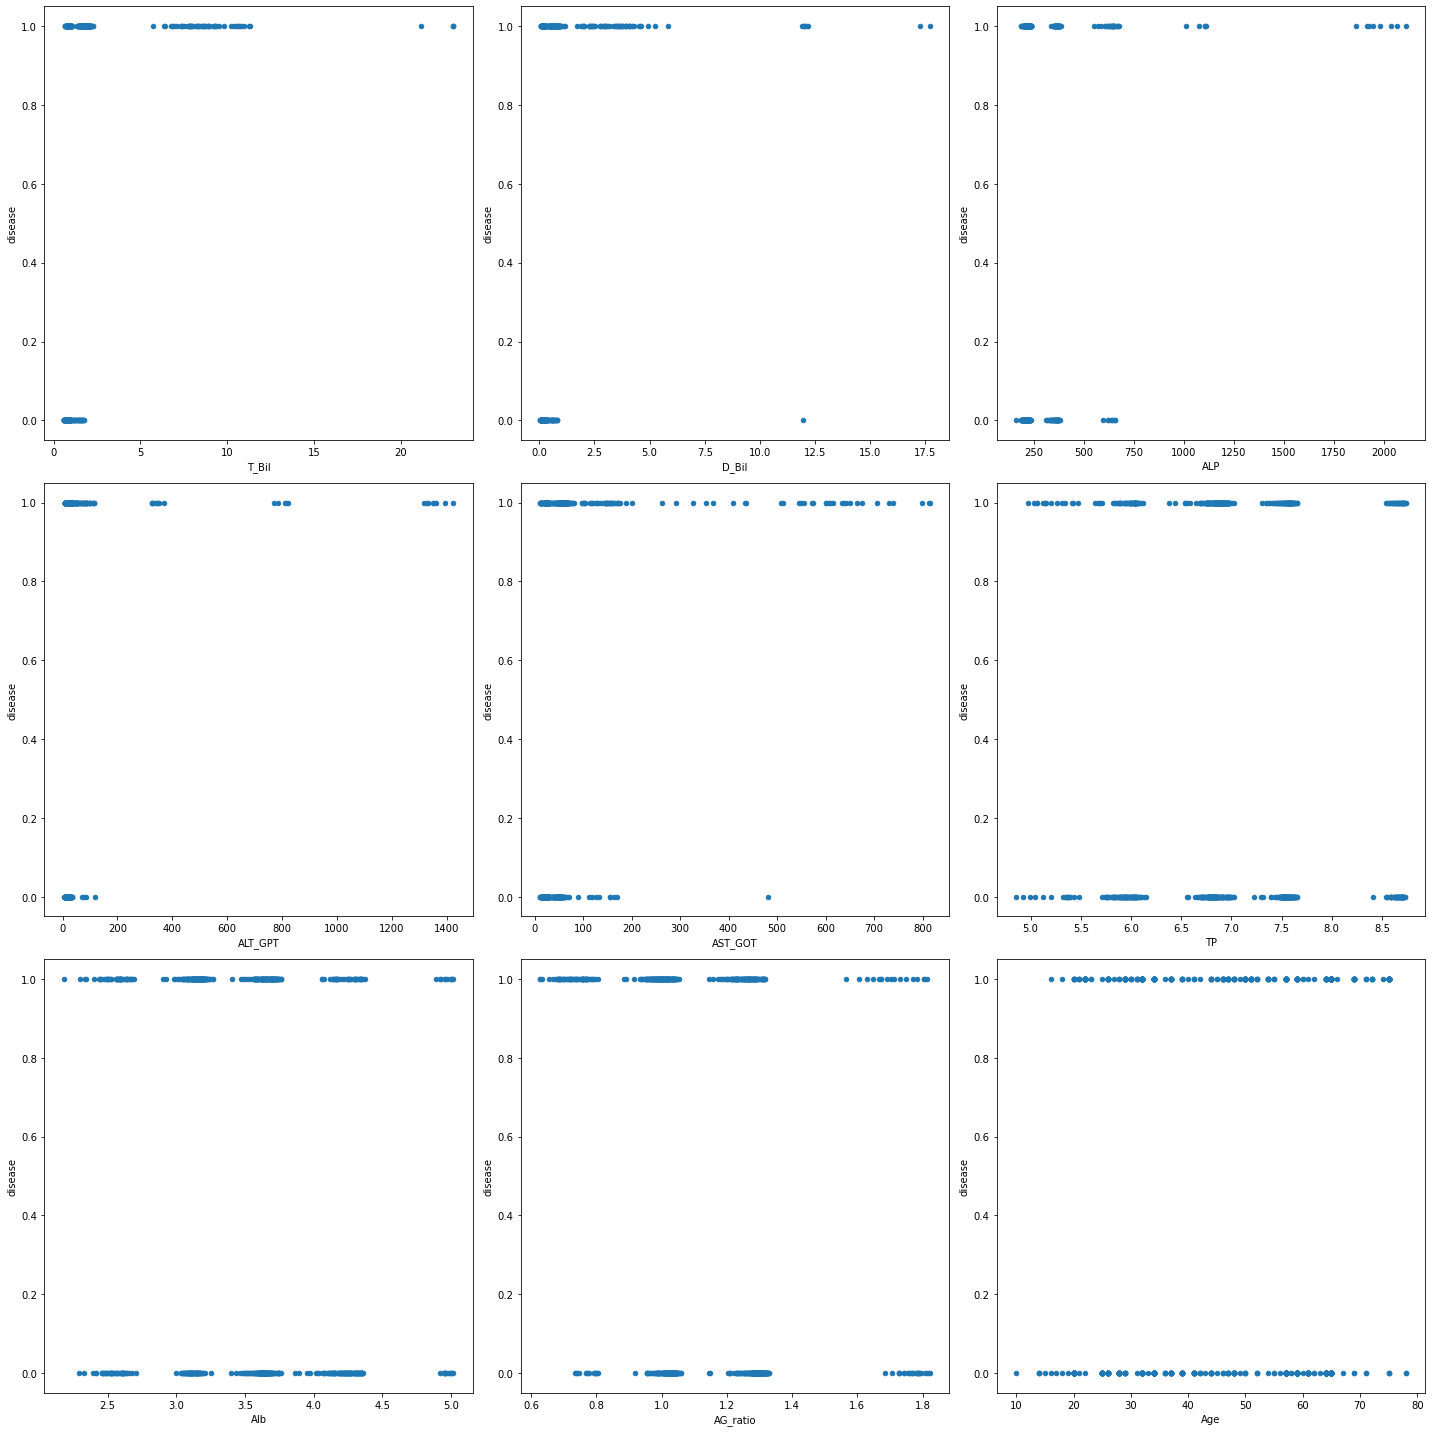

In [219]:
fig, ax = plt.subplots(3,3,figsize=(20,20))
df_train.plot.scatter(x="T_Bil", y="disease", ax=ax[0][0])
df_train.plot.scatter(x="D_Bil", y="disease", ax=ax[0][1])
df_train.plot.scatter(x="ALP", y="disease", ax=ax[0][2])
df_train.plot.scatter(x="ALT_GPT", y="disease", ax=ax[1][0])
df_train.plot.scatter(x="AST_GOT", y="disease", ax=ax[1][1])
df_train.plot.scatter(x="TP", y="disease", ax=ax[1][2])
df_train.plot.scatter(x="Alb", y="disease", ax=ax[2][0])
df_train.plot.scatter(x="AG_ratio", y="disease", ax=ax[2][1])
df_train.plot.scatter(x="Age", y="disease", ax=ax[2][2])
plt.tight_layout()


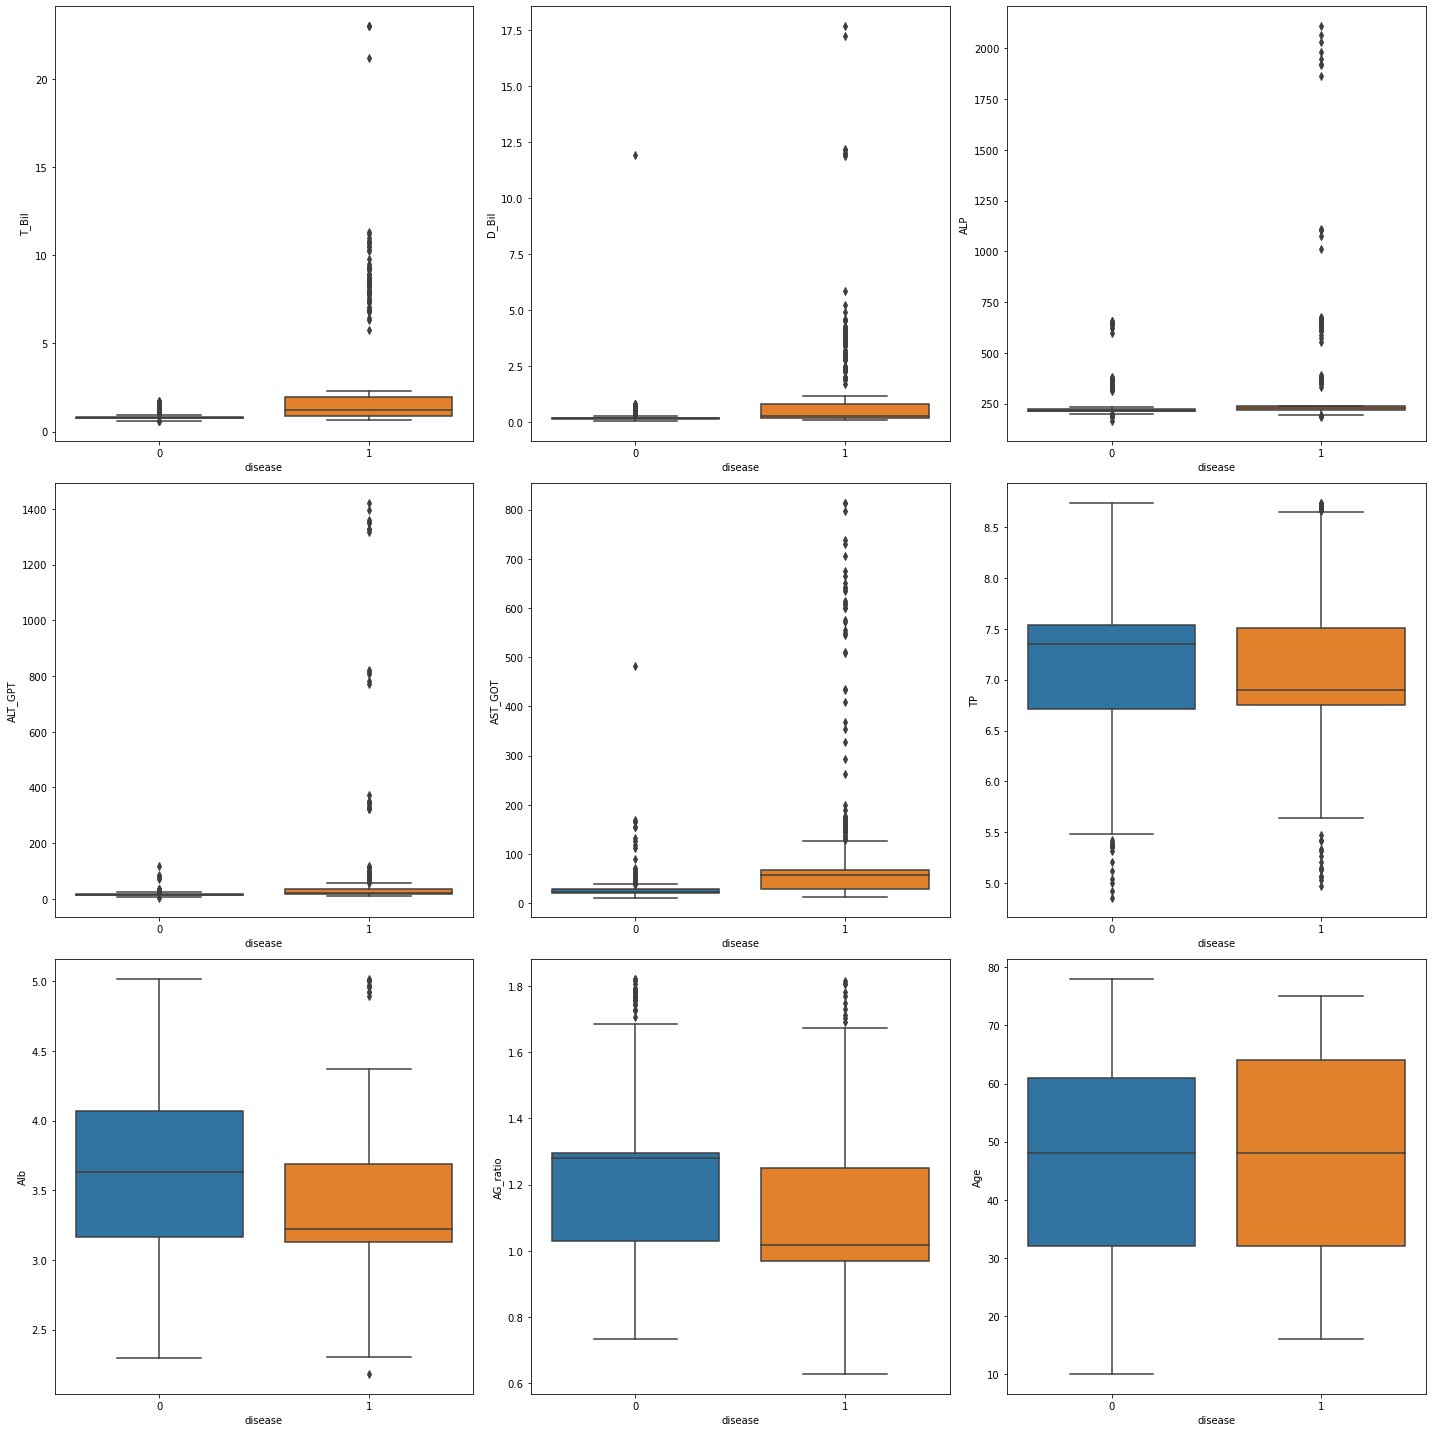

In [220]:
fig, ax = plt.subplots(3,3,figsize=(20,20))
sns.boxplot(x="disease",y="T_Bil",data=df_train,ax=ax[0][0])
sns.boxplot(x="disease",y="D_Bil",data=df_train,ax=ax[0][1])
sns.boxplot(x="disease",y="ALP",data=df_train,ax=ax[0][2])
sns.boxplot(x="disease",y="ALT_GPT",data=df_train,ax=ax[1][0])
sns.boxplot(x="disease",y="AST_GOT",data=df_train,ax=ax[1][1])
sns.boxplot(x="disease",y="TP",data=df_train,ax=ax[1][2])
sns.boxplot(x="disease",y="Alb",data=df_train,ax=ax[2][0])
sns.boxplot(x="disease",y="AG_ratio",data=df_train,ax=ax[2][1])
sns.boxplot(x="disease",y="Age",data=df_train,ax=ax[2][2])
plt.tight_layout()


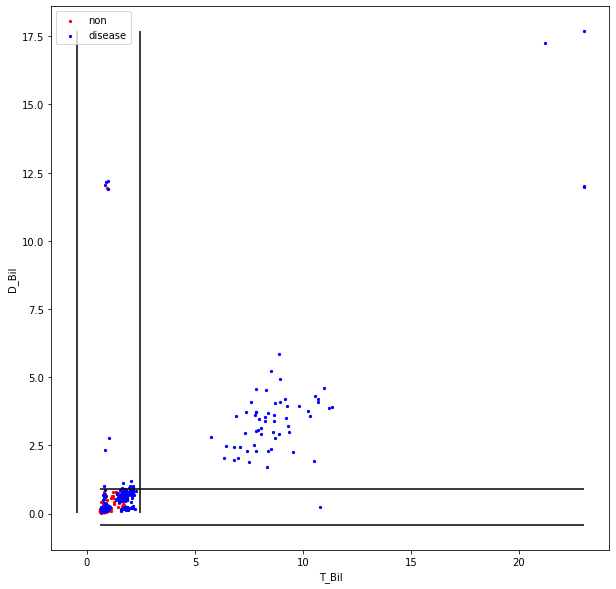

In [221]:
col1 = 'T_Bil'
col2 = 'D_Bil'
bai = 3

#棒グラフによる可視化
df_hist=df.loc[:,[col1,col2,'disease']]
n_data = np.array(df_hist.loc[df_hist['disease']==0,:])         # non
d_data = np.array(df_hist.loc[df_hist['disease']==1,:])         # disease

plt.figure(figsize=(10,10))

##  S ：点のサイズ
##  C ：色の指定 (r=赤、b=青、k=黒)
plt.scatter(n_data[:, 0], n_data[:, 1], s=5 ,c='r' , label="non")      
plt.scatter(d_data[:, 0], d_data[:, 1], s=5 ,c='b' , label="disease")  
plt.legend()

plt.xlabel(col1)   # X軸の名前
plt.ylabel(col2)   # Y軸の名前

x_min=np.min(df_hist[col1])
x_max=np.max(df_hist[col1])
y_min=np.min(df_hist[col2])
y_max=np.max(df_hist[col2])


## X軸の第１分位点から第３分位点
quartile_1 = df_desc.loc['25%',col1]
quartile_3 = df_desc.loc['75%',col1]
iqr = quartile_3 - quartile_1
# 下限
lower_bound = quartile_1 - (iqr * bai)
plt.vlines(x=lower_bound ,ymin=y_min, ymax=y_max )
# 上限
upper_bound = quartile_3 + (iqr * bai)
plt.vlines(x=upper_bound ,ymin=y_min, ymax=y_max)


## Y軸の第１分位点から第３分位点
quartile_1 = df_desc.loc['25%',col2]
quartile_3 = df_desc.loc['75%',col2]
iqr = quartile_3 - quartile_1
# 下限
lower_bound = quartile_1 - (iqr * bai)
plt.hlines(y=lower_bound ,xmin=x_min, xmax=x_max )
# 上限
upper_bound = quartile_3 + (iqr * bai)
plt.hlines(y=upper_bound ,xmin=x_min, xmax=x_max)

plt.show()

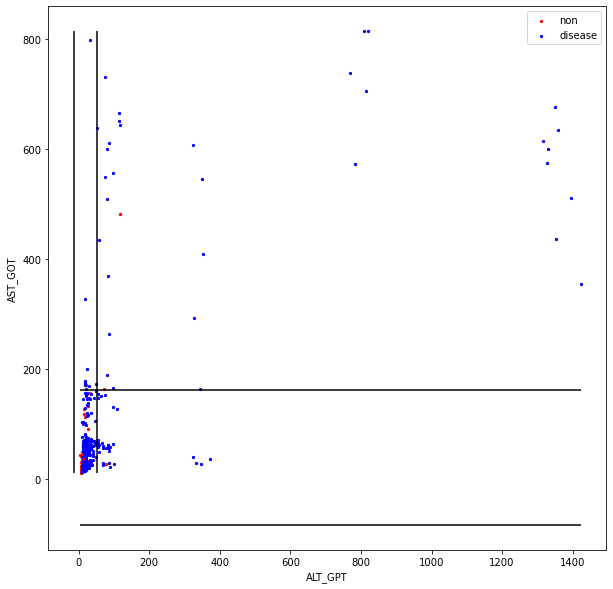

In [15]:
col1 = 'ALT_GPT'
col2 = 'AST_GOT'
bai = 3

#棒グラフによる可視化
df_hist=df.loc[:,[col1,col2,'disease']]
n_data = np.array(df_hist.loc[df_hist['disease']==0,:])         # non
d_data = np.array(df_hist.loc[df_hist['disease']==1,:])         # disease

plt.figure(figsize=(10,10))

##  S ：点のサイズ
##  C ：色の指定 (r=赤、b=青、k=黒)
plt.scatter(n_data[:, 0], n_data[:, 1], s=5 ,c='r' , label="non")      
plt.scatter(d_data[:, 0], d_data[:, 1], s=5 ,c='b' , label="disease")  
plt.legend()

plt.xlabel(col1)   # X軸の名前
plt.ylabel(col2)   # Y軸の名前

x_min=np.min(df_hist[col1])
x_max=np.max(df_hist[col1])
y_min=np.min(df_hist[col2])
y_max=np.max(df_hist[col2])


## X軸の第１分位点から第３分位点
quartile_1 = df_desc.loc['25%',col1]
quartile_3 = df_desc.loc['75%',col1]
iqr = quartile_3 - quartile_1
# 下限
lower_bound = quartile_1 - (iqr * bai)
plt.vlines(x=lower_bound ,ymin=y_min, ymax=y_max )
# 上限
upper_bound = quartile_3 + (iqr * bai)
plt.vlines(x=upper_bound ,ymin=y_min, ymax=y_max)


## Y軸の第１分位点から第３分位点
quartile_1 = df_desc.loc['25%',col2]
quartile_3 = df_desc.loc['75%',col2]
iqr = quartile_3 - quartile_1
# 下限
lower_bound = quartile_1 - (iqr * bai)
plt.hlines(y=lower_bound ,xmin=x_min, xmax=x_max )
# 上限
upper_bound = quartile_3 + (iqr * bai)
plt.hlines(y=upper_bound ,xmin=x_min, xmax=x_max)

plt.show()

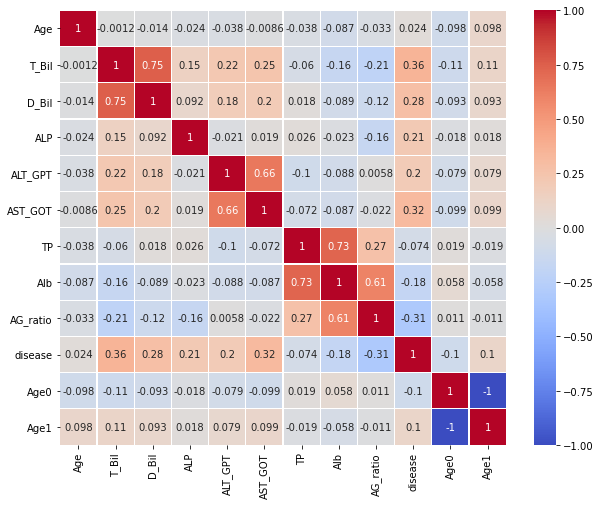

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
plt.show()

In [17]:
bai2 = 3

col='T_Bil'
std=df_desc.loc['std',col]*bai2

df.loc[df[col]>(std),col]=std

col='D_Bil'
std=df_desc.loc['std',col]*bai2
df.loc[df[col]>(std),col]=std

col='ALP'
std=df_desc.loc['std',col]*bai2
df.loc[df[col]>(std),col]=std

col='ALT_GPT'
std=df_desc.loc['std',col]*bai2
df.loc[df[col]>(std),col]=std

col='AST_GOT'
std=df_desc.loc['std',col]*bai2
df.loc[df[col]>(std),col]=std


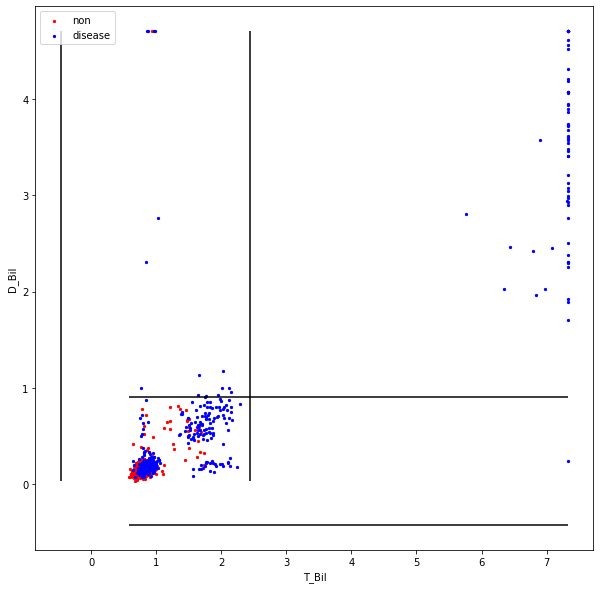

In [18]:
col1 = 'T_Bil'
col2 = 'D_Bil'
bai = 3

#棒グラフによる可視化
df_hist=df.loc[:,[col1,col2,'disease']]
n_data = np.array(df_hist.loc[df_hist['disease']==0,:])         # non
d_data = np.array(df_hist.loc[df_hist['disease']==1,:])         # disease

plt.figure(figsize=(10,10))

##  S ：点のサイズ
##  C ：色の指定 (r=赤、b=青、k=黒)
plt.scatter(n_data[:, 0], n_data[:, 1], s=5 ,c='r' , label="non")      
plt.scatter(d_data[:, 0], d_data[:, 1], s=5 ,c='b' , label="disease")  
plt.legend()

plt.xlabel(col1)   # X軸の名前
plt.ylabel(col2)   # Y軸の名前

x_min=np.min(df_hist[col1])
x_max=np.max(df_hist[col1])
y_min=np.min(df_hist[col2])
y_max=np.max(df_hist[col2])


## X軸の第１分位点から第３分位点
quartile_1 = df_desc.loc['25%',col1]
quartile_3 = df_desc.loc['75%',col1]
iqr = quartile_3 - quartile_1
# 下限
lower_bound = quartile_1 - (iqr * bai)
plt.vlines(x=lower_bound ,ymin=y_min, ymax=y_max )
# 上限
upper_bound = quartile_3 + (iqr * bai)
plt.vlines(x=upper_bound ,ymin=y_min, ymax=y_max)


## Y軸の第１分位点から第３分位点
quartile_1 = df_desc.loc['25%',col2]
quartile_3 = df_desc.loc['75%',col2]
iqr = quartile_3 - quartile_1
# 下限
lower_bound = quartile_1 - (iqr * bai)
plt.hlines(y=lower_bound ,xmin=x_min, xmax=x_max )
# 上限
upper_bound = quartile_3 + (iqr * bai)
plt.hlines(y=upper_bound ,xmin=x_min, xmax=x_max)

plt.show()

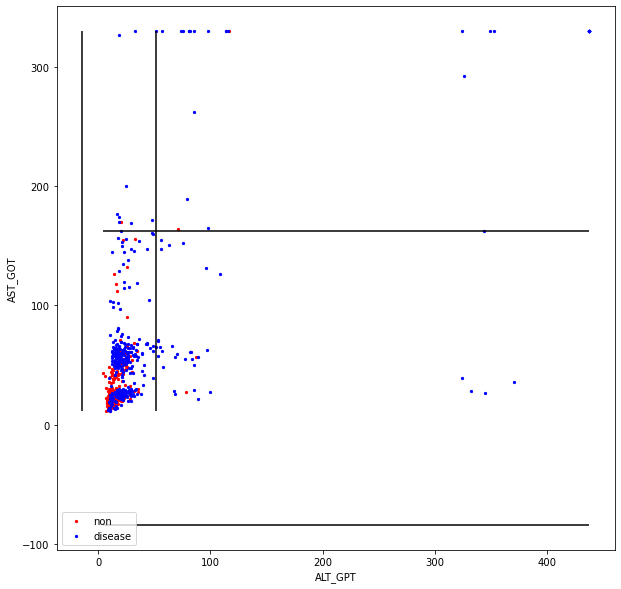

In [19]:
col1 = 'ALT_GPT'
col2 = 'AST_GOT'
bai = 3

#棒グラフによる可視化
df_hist=df.loc[:,[col1,col2,'disease']]
n_data = np.array(df_hist.loc[df_hist['disease']==0,:])         # non
d_data = np.array(df_hist.loc[df_hist['disease']==1,:])         # disease

plt.figure(figsize=(10,10))

##  S ：点のサイズ
##  C ：色の指定 (r=赤、b=青、k=黒)
plt.scatter(n_data[:, 0], n_data[:, 1], s=5 ,c='r' , label="non")      
plt.scatter(d_data[:, 0], d_data[:, 1], s=5 ,c='b' , label="disease")  
plt.legend()

plt.xlabel(col1)   # X軸の名前
plt.ylabel(col2)   # Y軸の名前

x_min=np.min(df_hist[col1])
x_max=np.max(df_hist[col1])
y_min=np.min(df_hist[col2])
y_max=np.max(df_hist[col2])


## X軸の第１分位点から第３分位点
quartile_1 = df_desc.loc['25%',col1]
quartile_3 = df_desc.loc['75%',col1]
iqr = quartile_3 - quartile_1
# 下限
lower_bound = quartile_1 - (iqr * bai)
plt.vlines(x=lower_bound ,ymin=y_min, ymax=y_max )
# 上限
upper_bound = quartile_3 + (iqr * bai)
plt.vlines(x=upper_bound ,ymin=y_min, ymax=y_max)


## Y軸の第１分位点から第３分位点
quartile_1 = df_desc.loc['25%',col2]
quartile_3 = df_desc.loc['75%',col2]
iqr = quartile_3 - quartile_1
# 下限
lower_bound = quartile_1 - (iqr * bai)
plt.hlines(y=lower_bound ,xmin=x_min, xmax=x_max )
# 上限
upper_bound = quartile_3 + (iqr * bai)
plt.hlines(y=upper_bound ,xmin=x_min, xmax=x_max)

plt.show()

# ３σを最大値に置き換える

In [132]:
df_train = pd.read_csv('train.csv')
df=df_train
gemder=pd.get_dummies(df.loc[:,['Gender']])
df['Age0']=gemder.loc[:,['Gender_Female']]
df['Age1']=gemder.loc[:,['Gender_Male']]
df = df.astype({'Age0': 'int32', 'Age1': 'int32'})
df.drop(columns=['Gender'],inplace=True)

In [133]:
bai3 = 3

col='T_Bil'
std=df_desc.loc['75%',col]*bai3
df.loc[df[col]>(std),col]=std

col='D_Bil'
std=df_desc.loc['75%',col]*bai3
df.loc[df[col]>(std),col]=std

col='ALP'
std=df_desc.loc['75%',col]*bai3
df.loc[df[col]>(std),col]=std

col='ALT_GPT'
std=df_desc.loc['75%',col]*bai3
df.loc[df[col]>(std),col]=std

col='AST_GOT'
std=df_desc.loc['75%',col]*bai3
df.loc[df[col]>(std),col]=std


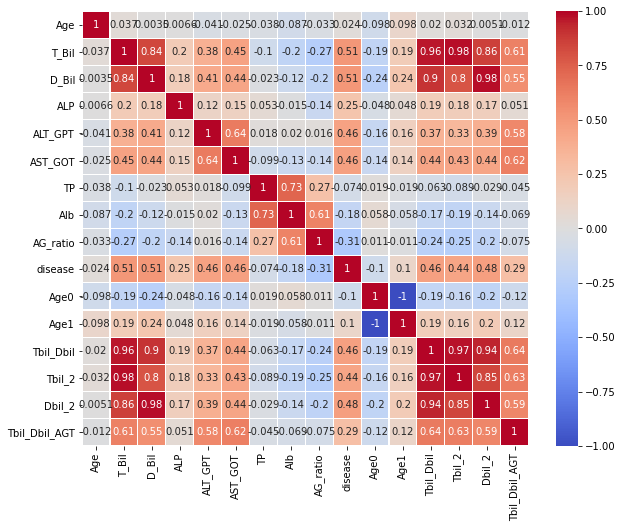

              Age       T_Bil       D_Bil         ALP     ALT_GPT     AST_GOT  \
count  850.000000  850.000000  850.000000  850.000000  850.000000  850.000000   
mean    46.610588    1.179605    0.316775  257.756930   21.968669   45.489418   
std     16.453672    0.772690    0.281758  105.928514   15.047603   39.368708   
min     10.000000    0.585961    0.034861  163.261838    3.924518   11.283497   
25%     32.000000    0.781258    0.144889  213.991414   13.644658   21.239157   
50%     48.000000    0.835591    0.194085  220.092503   16.638001   27.056026   
75%     62.000000    1.196759    0.335447  229.455927   23.056081   56.461568   
max     78.000000    3.590277    1.006340  688.367780   69.168242  169.384703   

               TP         Alb    AG_ratio     disease        Age0        Age1  \
count  850.000000  850.000000  850.000000  850.000000  850.000000  850.000000   
mean     7.032290    3.517458    1.144570    0.444706    0.174118    0.825882   
std      0.840664    0.5599

In [134]:

plt.figure(figsize=(10,8))
df_sns = df
df_sns['Tbil_Dbil']=df['T_Bil'] * df['D_Bil']
df_sns['Tbil_2']=df['T_Bil'] * df['T_Bil']
df_sns['Dbil_2']=df['D_Bil'] * df['D_Bil']
df_sns['Tbil_Dbil_AGT']=df['T_Bil'] * df['D_Bil']*df['ALT_GPT'] * df['AST_GOT']
sns.heatmap(df_sns.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
plt.show()


print(df_sns.describe())

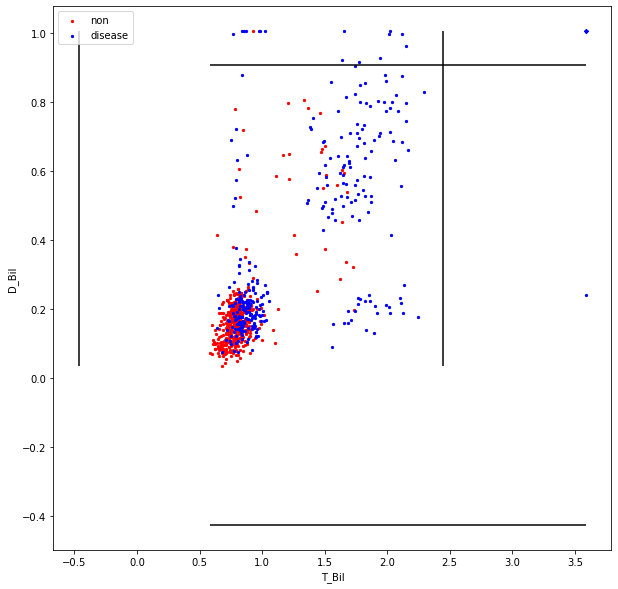

In [135]:
col1 = 'T_Bil'
col2 = 'D_Bil'
bai = 3

# 結果によって分割
df_hist=df.loc[:,[col1,col2,'disease']]
n_data = np.array(df_hist.loc[df_hist['disease']==0,:])         # non
d_data = np.array(df_hist.loc[df_hist['disease']==1,:])         # disease

plt.figure(figsize=(10,10))

##  S ：点のサイズ
##  C ：色の指定 (r=赤、b=青、k=黒)
plt.scatter(n_data[:, 0], n_data[:, 1], s=5 ,c='r' , label="non")      
plt.scatter(d_data[:, 0], d_data[:, 1], s=5 ,c='b' , label="disease")  
plt.legend()

plt.xlabel(col1)   # X軸の名前
plt.ylabel(col2)   # Y軸の名前

x_min=np.min(df_hist[col1])
x_max=np.max(df_hist[col1])
y_min=np.min(df_hist[col2])
y_max=np.max(df_hist[col2])


## X軸の第１分位点から第３分位点
quartile_1 = df_desc.loc['25%',col1]
quartile_3 = df_desc.loc['75%',col1]
iqr = quartile_3 - quartile_1
# 下限
lower_bound = quartile_1 - (iqr * bai)
plt.vlines(x=lower_bound ,ymin=y_min, ymax=y_max )
# 上限
upper_bound = quartile_3 + (iqr * bai)
plt.vlines(x=upper_bound ,ymin=y_min, ymax=y_max)


## Y軸の第１分位点から第３分位点
quartile_1 = df_desc.loc['25%',col2]
quartile_3 = df_desc.loc['75%',col2]
iqr = quartile_3 - quartile_1
# 下限
lower_bound = quartile_1 - (iqr * bai)
plt.hlines(y=lower_bound ,xmin=x_min, xmax=x_max )
# 上限
upper_bound = quartile_3 + (iqr * bai)
plt.hlines(y=upper_bound ,xmin=x_min, xmax=x_max)

plt.show()

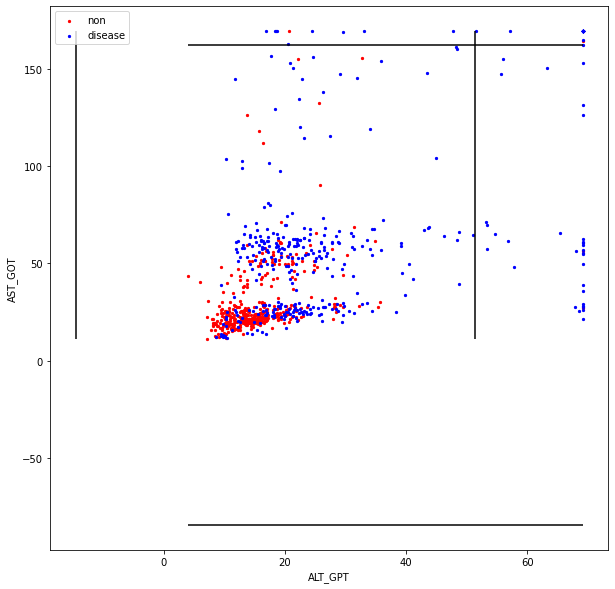

In [136]:
col1 = 'ALT_GPT'
col2 = 'AST_GOT'
bai = 3

# 結果によって分割
df_hist=df.loc[:,[col1,col2,'disease']]
n_data = np.array(df_hist.loc[df_hist['disease']==0,:])         # non
d_data = np.array(df_hist.loc[df_hist['disease']==1,:])         # disease

plt.figure(figsize=(10,10))

##  S ：点のサイズ
##  C ：色の指定 (r=赤、b=青、k=黒)
plt.scatter(n_data[:, 0], n_data[:, 1], s=5 ,c='r' , label="non")      
plt.scatter(d_data[:, 0], d_data[:, 1], s=5 ,c='b' , label="disease")  
plt.legend()

plt.xlabel(col1)   # X軸の名前
plt.ylabel(col2)   # Y軸の名前

x_min=np.min(df_hist[col1])
x_max=np.max(df_hist[col1])
y_min=np.min(df_hist[col2])
y_max=np.max(df_hist[col2])


## X軸の第１分位点から第３分位点
quartile_1 = df_desc.loc['25%',col1]
quartile_3 = df_desc.loc['75%',col1]
iqr = quartile_3 - quartile_1
# 下限
lower_bound = quartile_1 - (iqr * bai)
plt.vlines(x=lower_bound ,ymin=y_min, ymax=y_max )
# 上限
upper_bound = quartile_3 + (iqr * bai)
plt.vlines(x=upper_bound ,ymin=y_min, ymax=y_max)


## Y軸の第１分位点から第３分位点
quartile_1 = df_desc.loc['25%',col2]
quartile_3 = df_desc.loc['75%',col2]
iqr = quartile_3 - quartile_1
# 下限
lower_bound = quartile_1 - (iqr * bai)
plt.hlines(y=lower_bound ,xmin=x_min, xmax=x_max )
# 上限
upper_bound = quartile_3 + (iqr * bai)
plt.hlines(y=upper_bound ,xmin=x_min, xmax=x_max)

plt.show()

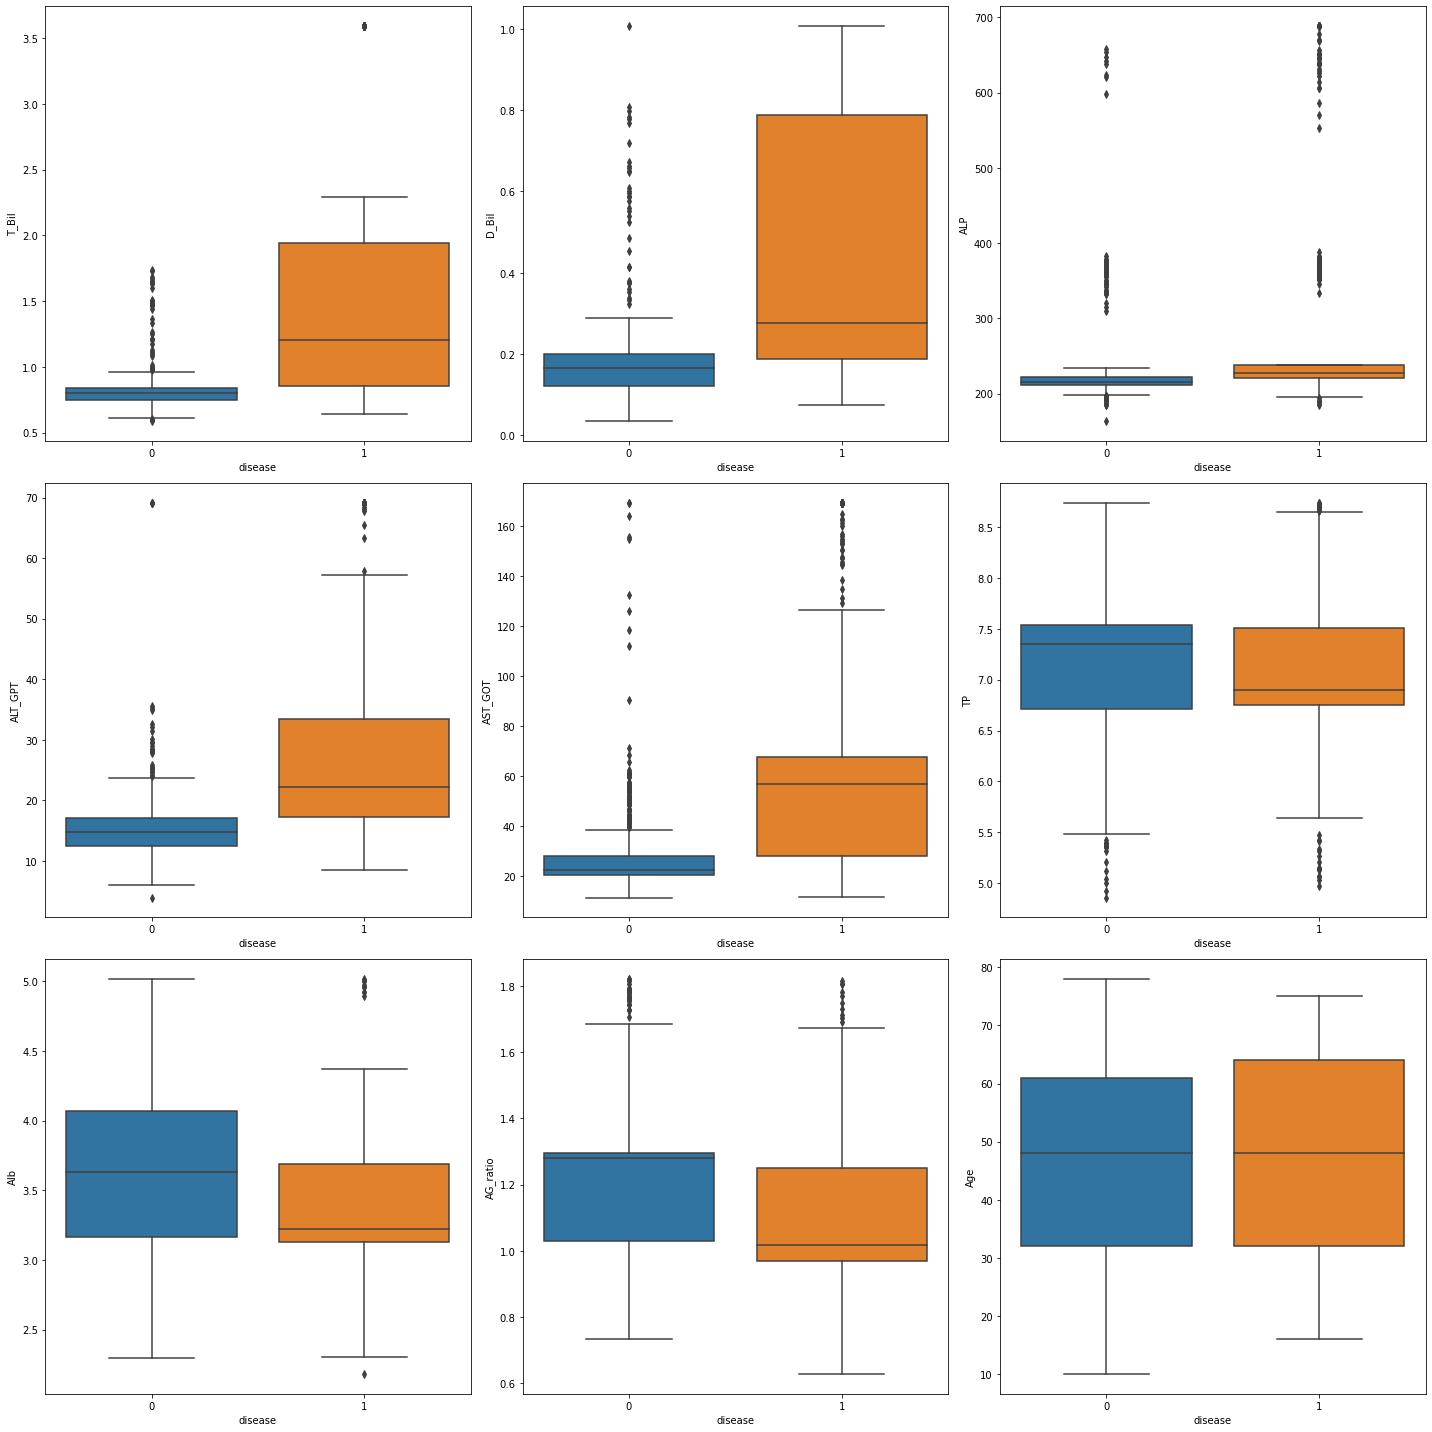

In [137]:
fig, ax = plt.subplots(3,3,figsize=(20,20))
sns.boxplot(x="disease",y="T_Bil",data=df,ax=ax[0][0])
sns.boxplot(x="disease",y="D_Bil",data=df,ax=ax[0][1])
sns.boxplot(x="disease",y="ALP",data=df,ax=ax[0][2])
sns.boxplot(x="disease",y="ALT_GPT",data=df,ax=ax[1][0])
sns.boxplot(x="disease",y="AST_GOT",data=df,ax=ax[1][1])
sns.boxplot(x="disease",y="TP",data=df,ax=ax[1][2])
sns.boxplot(x="disease",y="Alb",data=df,ax=ax[2][0])
sns.boxplot(x="disease",y="AG_ratio",data=df,ax=ax[2][1])
sns.boxplot(x="disease",y="Age",data=df,ax=ax[2][2])
plt.tight_layout()


# 最大値で割る

In [126]:
df_train = pd.read_csv('train.csv')
df=df_train
gemder=pd.get_dummies(df.loc[:,['Gender']])
df['Age0']=gemder.loc[:,['Gender_Female']]
df['Age1']=gemder.loc[:,['Gender_Male']]
df = df.astype({'Age0': 'int32', 'Age1': 'int32'})
df.drop(columns=['Gender'],inplace=True)

In [127]:
col='T_Bil'
maxval=df_desc.loc['max',col]
df.loc[:,col]=df.loc[:,col]/maxval

col='D_Bil'
maxval=df_desc.loc['max',col]
df.loc[:,col]=df.loc[:,col]/maxval

col='ALP'
maxval=df_desc.loc['max',col]
df.loc[:,col]=df.loc[:,col]/maxval

col='ALT_GPT'
maxval=df_desc.loc['max',col]
df.loc[:,col]=df.loc[:,col]/maxval

col='AST_GOT'
maxval=df_desc.loc['max',col]
df.loc[:,col]=df.loc[:,col]/maxval

col='TP'
maxval=df_desc.loc['max',col]
df.loc[:,col]=df.loc[:,col]/maxval

col='Alb'
maxval=df_desc.loc['max',col]
df.loc[:,col]=df.loc[:,col]/maxval

col='AG_ratio'
maxval=df_desc.loc['max',col]
df.loc[:,col]=df.loc[:,col]/maxval

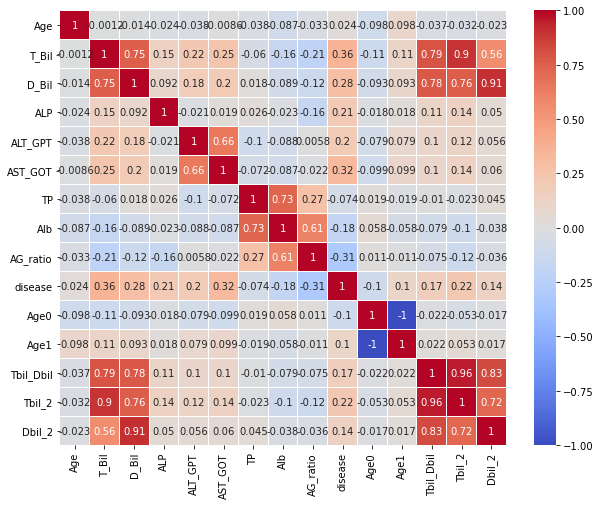

              Age       T_Bil       D_Bil         ALP     ALT_GPT     AST_GOT  \
count  850.000000  850.000000  850.000000  850.000000  850.000000  850.000000   
mean    46.610588    0.069833    0.034294    0.129103    0.029496    0.074920   
std     16.453672    0.106164    0.088685    0.095020    0.102536    0.135216   
min     10.000000    0.025458    0.001970    0.077431    0.002758    0.013854   
25%     32.000000    0.033943    0.008189    0.101491    0.009587    0.026078   
50%     48.000000    0.036303    0.010970    0.104384    0.011691    0.033220   
75%     62.000000    0.051995    0.018960    0.108825    0.016200    0.069326   
max     78.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               TP         Alb    AG_ratio     disease        Age0        Age1  \
count  850.000000  850.000000  850.000000  850.000000  850.000000  850.000000   
mean     0.804702    0.701112    0.628368    0.444706    0.174118    0.825882   
std      0.096197    0.1116

In [128]:
# seabornライブラリをsnsという省略名でインポート
import seaborn as sns
plt.figure(figsize=(10,8))
df_sns = df
df_sns['Tbil_Dbil']=df['T_Bil'] * df['D_Bil']
df_sns['Tbil_2']=df['T_Bil'] * df['T_Bil']
df_sns['Dbil_2']=df['D_Bil'] * df['D_Bil']
sns.heatmap(df_sns.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
plt.show()


print(df_sns.describe())

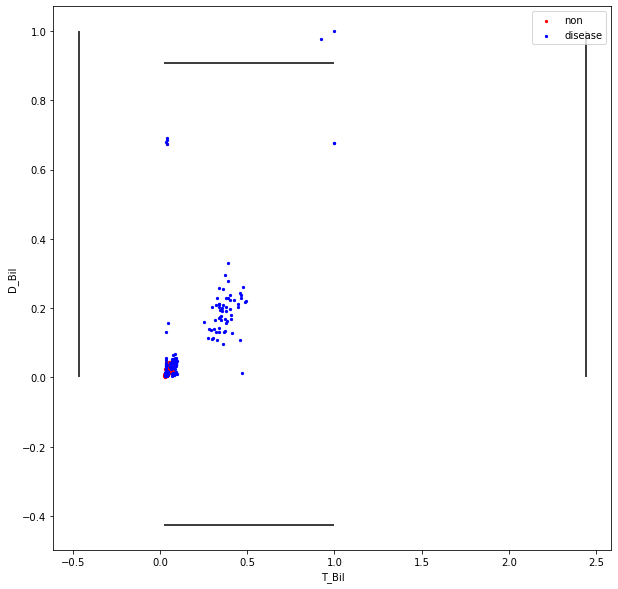

In [129]:
col1 = 'T_Bil'
col2 = 'D_Bil'
bai = 3

# 結果によって分割
df_hist=df.loc[:,[col1,col2,'disease']]
n_data = np.array(df_hist.loc[df_hist['disease']==0,:])         # non
d_data = np.array(df_hist.loc[df_hist['disease']==1,:])         # disease

plt.figure(figsize=(10,10))

##  S ：点のサイズ
##  C ：色の指定 (r=赤、b=青、k=黒)
plt.scatter(n_data[:, 0], n_data[:, 1], s=5 ,c='r' , label="non")      
plt.scatter(d_data[:, 0], d_data[:, 1], s=5 ,c='b' , label="disease")  
plt.legend()

plt.xlabel(col1)   # X軸の名前
plt.ylabel(col2)   # Y軸の名前

x_min=np.min(df_hist[col1])
x_max=np.max(df_hist[col1])
y_min=np.min(df_hist[col2])
y_max=np.max(df_hist[col2])


## X軸の第１分位点から第３分位点
quartile_1 = df_desc.loc['25%',col1]
quartile_3 = df_desc.loc['75%',col1]
iqr = quartile_3 - quartile_1
# 下限
lower_bound = quartile_1 - (iqr * bai)
plt.vlines(x=lower_bound ,ymin=y_min, ymax=y_max )
# 上限
upper_bound = quartile_3 + (iqr * bai)
plt.vlines(x=upper_bound ,ymin=y_min, ymax=y_max)


## Y軸の第１分位点から第３分位点
quartile_1 = df_desc.loc['25%',col2]
quartile_3 = df_desc.loc['75%',col2]
iqr = quartile_3 - quartile_1
# 下限
lower_bound = quartile_1 - (iqr * bai)
plt.hlines(y=lower_bound ,xmin=x_min, xmax=x_max )
# 上限
upper_bound = quartile_3 + (iqr * bai)
plt.hlines(y=upper_bound ,xmin=x_min, xmax=x_max)

plt.show()

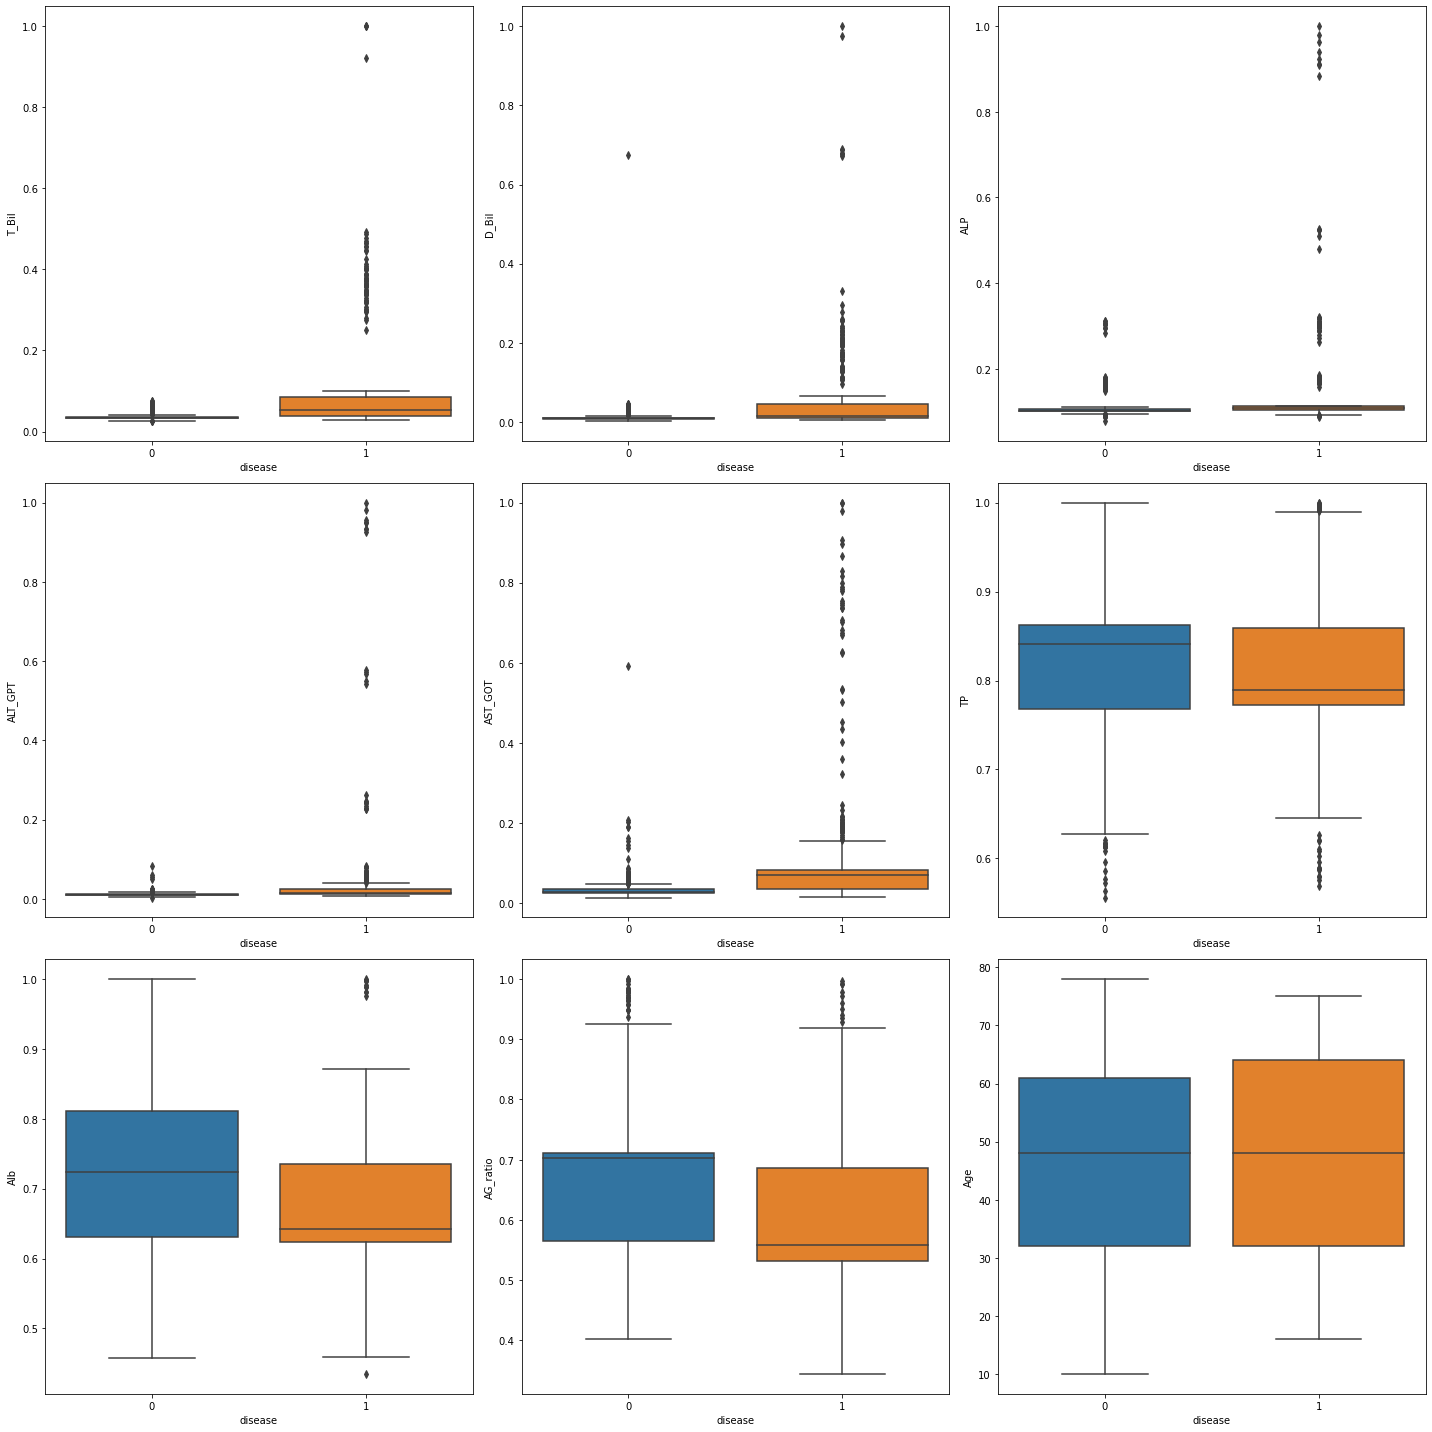

In [130]:
fig, ax = plt.subplots(3,3,figsize=(20,20))
sns.boxplot(x="disease",y="T_Bil",data=df,ax=ax[0][0])
sns.boxplot(x="disease",y="D_Bil",data=df,ax=ax[0][1])
sns.boxplot(x="disease",y="ALP",data=df,ax=ax[0][2])
sns.boxplot(x="disease",y="ALT_GPT",data=df,ax=ax[1][0])
sns.boxplot(x="disease",y="AST_GOT",data=df,ax=ax[1][1])
sns.boxplot(x="disease",y="TP",data=df,ax=ax[1][2])
sns.boxplot(x="disease",y="Alb",data=df,ax=ax[2][0])
sns.boxplot(x="disease",y="AG_ratio",data=df,ax=ax[2][1])
sns.boxplot(x="disease",y="Age",data=df,ax=ax[2][2])
plt.tight_layout()


# ３σを最大値に置き換えた後に、最大値で割る

In [200]:
df_train = pd.read_csv('train.csv')
df=df_train
gemder=pd.get_dummies(df.loc[:,['Gender']])
df['Age0']=gemder.loc[:,['Gender_Female']]
df['Age1']=gemder.loc[:,['Gender_Male']]
df = df.astype({'Age0': 'int32', 'Age1': 'int32'})
df.drop(columns=['Gender'],inplace=True)

In [201]:
bai3 = 3

col='T_Bil'
std=df_desc.loc['75%',col]*bai3
std=df.loc[df[col]<(std),col].max()
df.loc[df[col]>(std),col]=std

col='D_Bil'
std=df_desc.loc['75%',col]*bai3
std=df.loc[df[col]<(std),col].max()
df.loc[df[col]>(std),col]=std

col='ALP'
std=df_desc.loc['75%',col]*bai3
std=250
df.loc[df[col]>(std),col]=std

col='ALT_GPT'
std=df_desc.loc['75%',col]*bai3
std=df.loc[df[col]<(std),col].max()
df.loc[df[col]>(std),col]=std

col='AST_GOT'
std=df_desc.loc['75%',col]*bai3
std=df.loc[df[col]<(std),col].max()
df.loc[df[col]>(std),col]=std

col='Alb'
std=df_desc.loc['75%',col]*bai3
std=df.loc[df[col]<(std),col].max()
df.loc[df[col]>(std),col]=std

col='AG_ratio'
std=df_desc.loc['75%',col]*bai3
std=df.loc[df[col]<(std),col].max()
df.loc[df[col]>(std),col]=std


col='TP'
std=df_desc.loc['75%',col]*bai3
std=5.5
df.loc[df[col]<(std),col]=std

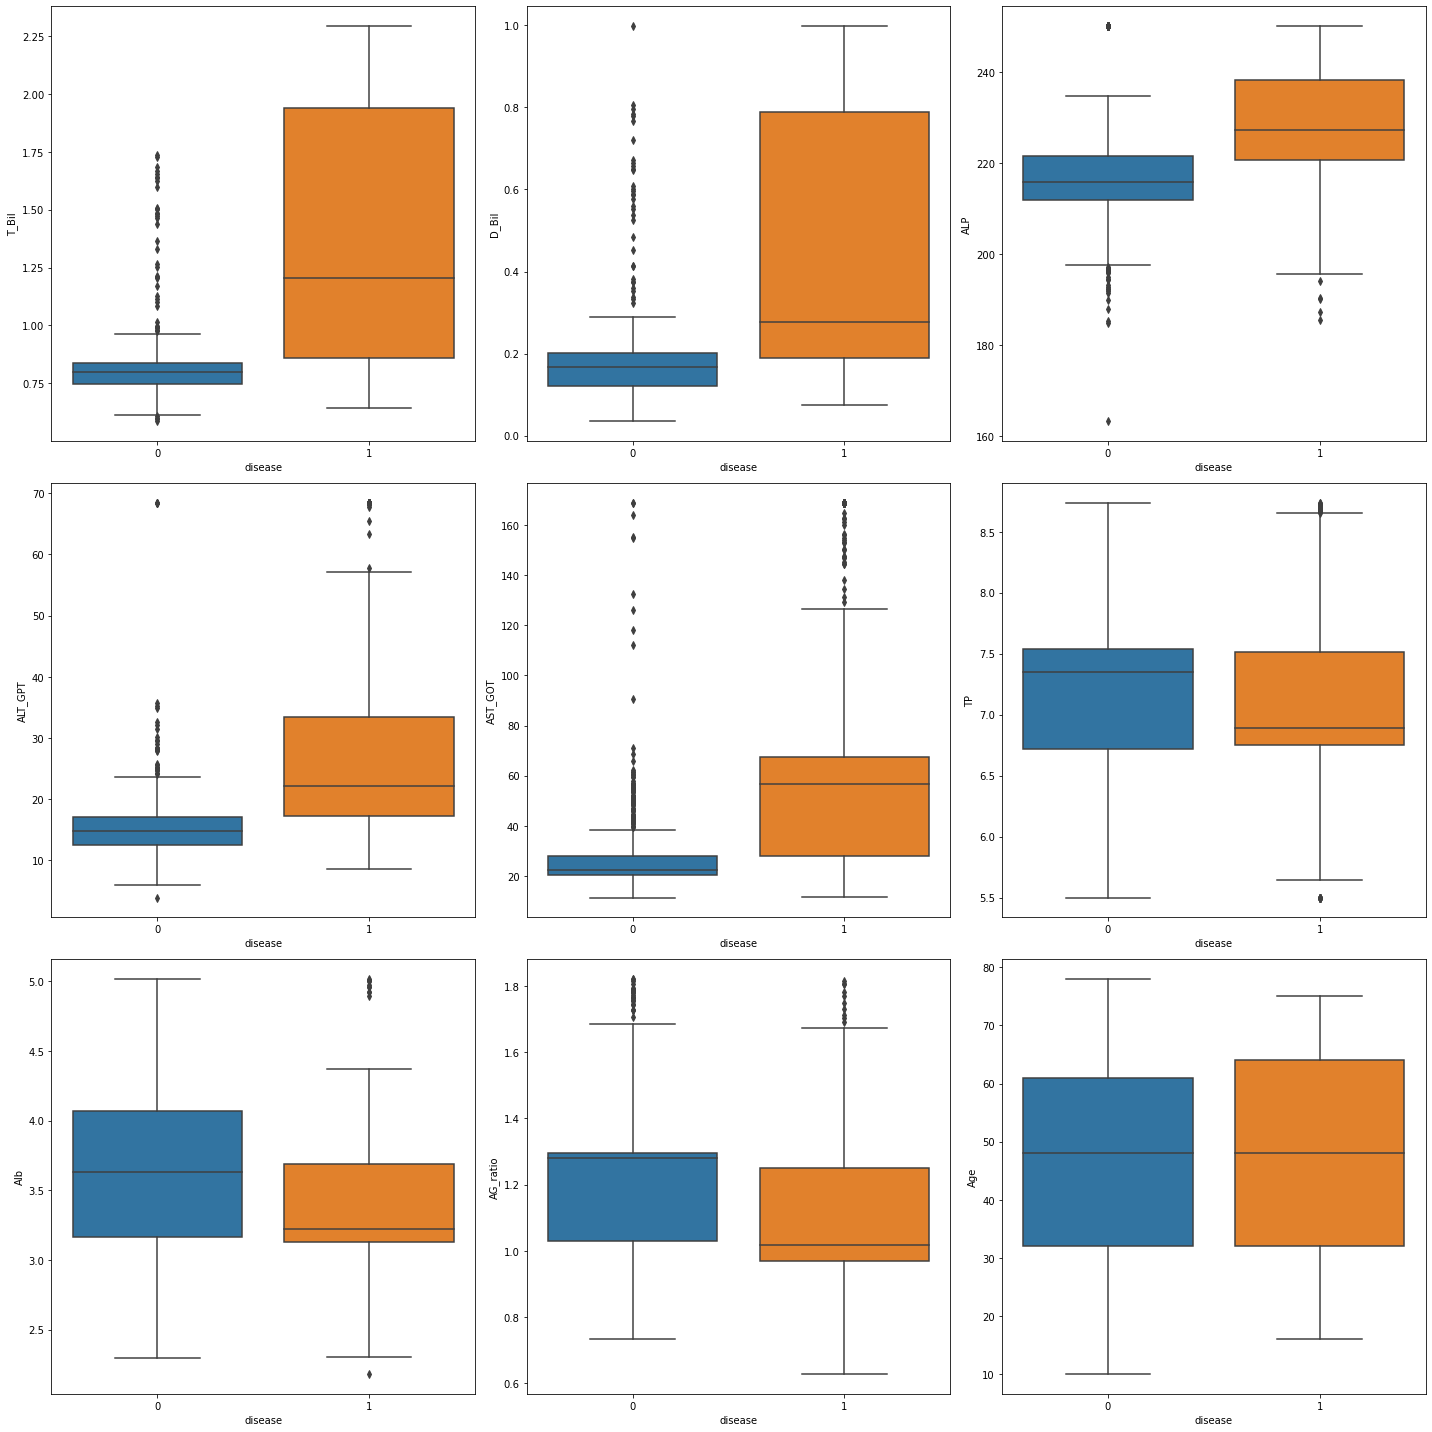

In [202]:
fig, ax = plt.subplots(3,3,figsize=(20,20))
sns.boxplot(x="disease",y="T_Bil",data=df,ax=ax[0][0])
sns.boxplot(x="disease",y="D_Bil",data=df,ax=ax[0][1])
sns.boxplot(x="disease",y="ALP",data=df,ax=ax[0][2])
sns.boxplot(x="disease",y="ALT_GPT",data=df,ax=ax[1][0])
sns.boxplot(x="disease",y="AST_GOT",data=df,ax=ax[1][1])
sns.boxplot(x="disease",y="TP",data=df,ax=ax[1][2])
sns.boxplot(x="disease",y="Alb",data=df,ax=ax[2][0])
sns.boxplot(x="disease",y="AG_ratio",data=df,ax=ax[2][1])
sns.boxplot(x="disease",y="Age",data=df,ax=ax[2][2])
plt.tight_layout()


In [183]:
col='T_Bil'
maxval=df_desc.loc['75%',col]*bai3
df.loc[:,col]=df.loc[:,col]/maxval

col='D_Bil'
maxval=df_desc.loc['75%',col]*bai3
df.loc[:,col]=df.loc[:,col]/maxval

col='ALP'
maxval=df_desc.loc['75%',col]*bai3
df.loc[:,col]=df.loc[:,col]/maxval

col='ALT_GPT'
maxval=df_desc.loc['75%',col]*bai3
df.loc[:,col]=df.loc[:,col]/maxval

col='AST_GOT'
maxval=df_desc.loc['75%',col]*bai3
df.loc[:,col]=df.loc[:,col]/maxval

col='TP'
maxval=df_desc.loc['max',col]
df.loc[:,col]=df.loc[:,col]/maxval

col='Alb'
maxval=df_desc.loc['max',col]
df.loc[:,col]=df.loc[:,col]/maxval

col='AG_ratio'
maxval=df_desc.loc['max',col]
df.loc[:,col]=df.loc[:,col]/maxval

In [184]:
df.describe()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease,Age0,Age1
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,46.610588,0.295411,0.295804,0.323852,0.298063,0.248737,0.805843,0.701112,0.628368,0.444706,0.174118,0.825882
std,16.453672,0.125265,0.236746,0.021946,0.160853,0.175890,0.093822,0.111610,0.124753,0.497226,0.379434,0.379434
min,10.000000,0.163208,0.034641,0.237172,0.056739,0.066615,0.629363,0.434701,0.344295,0.000000,0.000000,0.000000
25%,32.000000,0.217604,0.143976,0.310868,0.197268,0.125390,0.770181,0.625707,0.551451,0.000000,0.000000,1.000000
50%,48.000000,0.232737,0.192863,0.319731,0.240544,0.159731,0.791347,0.721818,0.661553,0.000000,0.000000,1.000000
75%,62.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.862358,0.739993,0.707045,1.000000,0.000000,1.000000
max,78.000000,0.557060,0.794960,0.363178,0.722875,0.708446,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


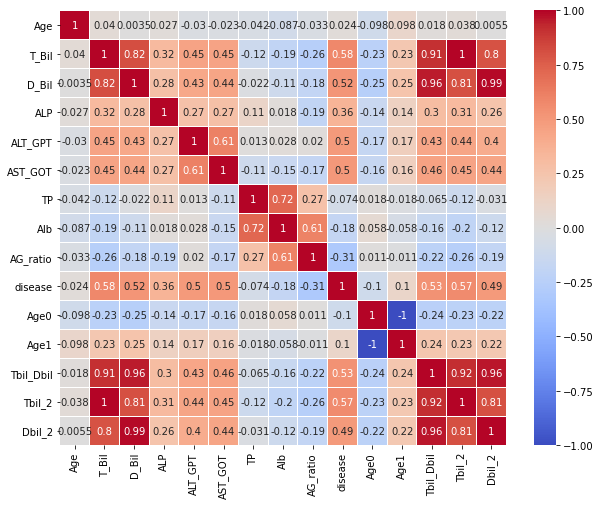

              Age       T_Bil       D_Bil         ALP     ALT_GPT     AST_GOT  \
count  850.000000  850.000000  850.000000  850.000000  850.000000  850.000000   
mean    46.610588    0.295411    0.295804    0.323852    0.298063    0.248737   
std     16.453672    0.125265    0.236746    0.021946    0.160853    0.175890   
min     10.000000    0.163208    0.034641    0.237172    0.056739    0.066615   
25%     32.000000    0.217604    0.143976    0.310868    0.197268    0.125390   
50%     48.000000    0.232737    0.192863    0.319731    0.240544    0.159731   
75%     62.000000    0.333333    0.333333    0.333333    0.333333    0.333333   
max     78.000000    0.557060    0.794960    0.363178    0.722875    0.708446   

               TP         Alb    AG_ratio     disease        Age0        Age1  \
count  850.000000  850.000000  850.000000  850.000000  850.000000  850.000000   
mean     0.805843    0.701112    0.628368    0.444706    0.174118    0.825882   
std      0.093822    0.1116

In [185]:
# seabornライブラリをsnsという省略名でインポート
import seaborn as sns
plt.figure(figsize=(10,8))
df_sns = df
df_sns['Tbil_Dbil']=df['T_Bil'] * df['D_Bil']
df_sns['Tbil_2']=df['T_Bil'] * df['T_Bil']
df_sns['Dbil_2']=df['D_Bil'] * df['D_Bil']
sns.heatmap(df_sns.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
plt.show()


print(df_sns.describe())

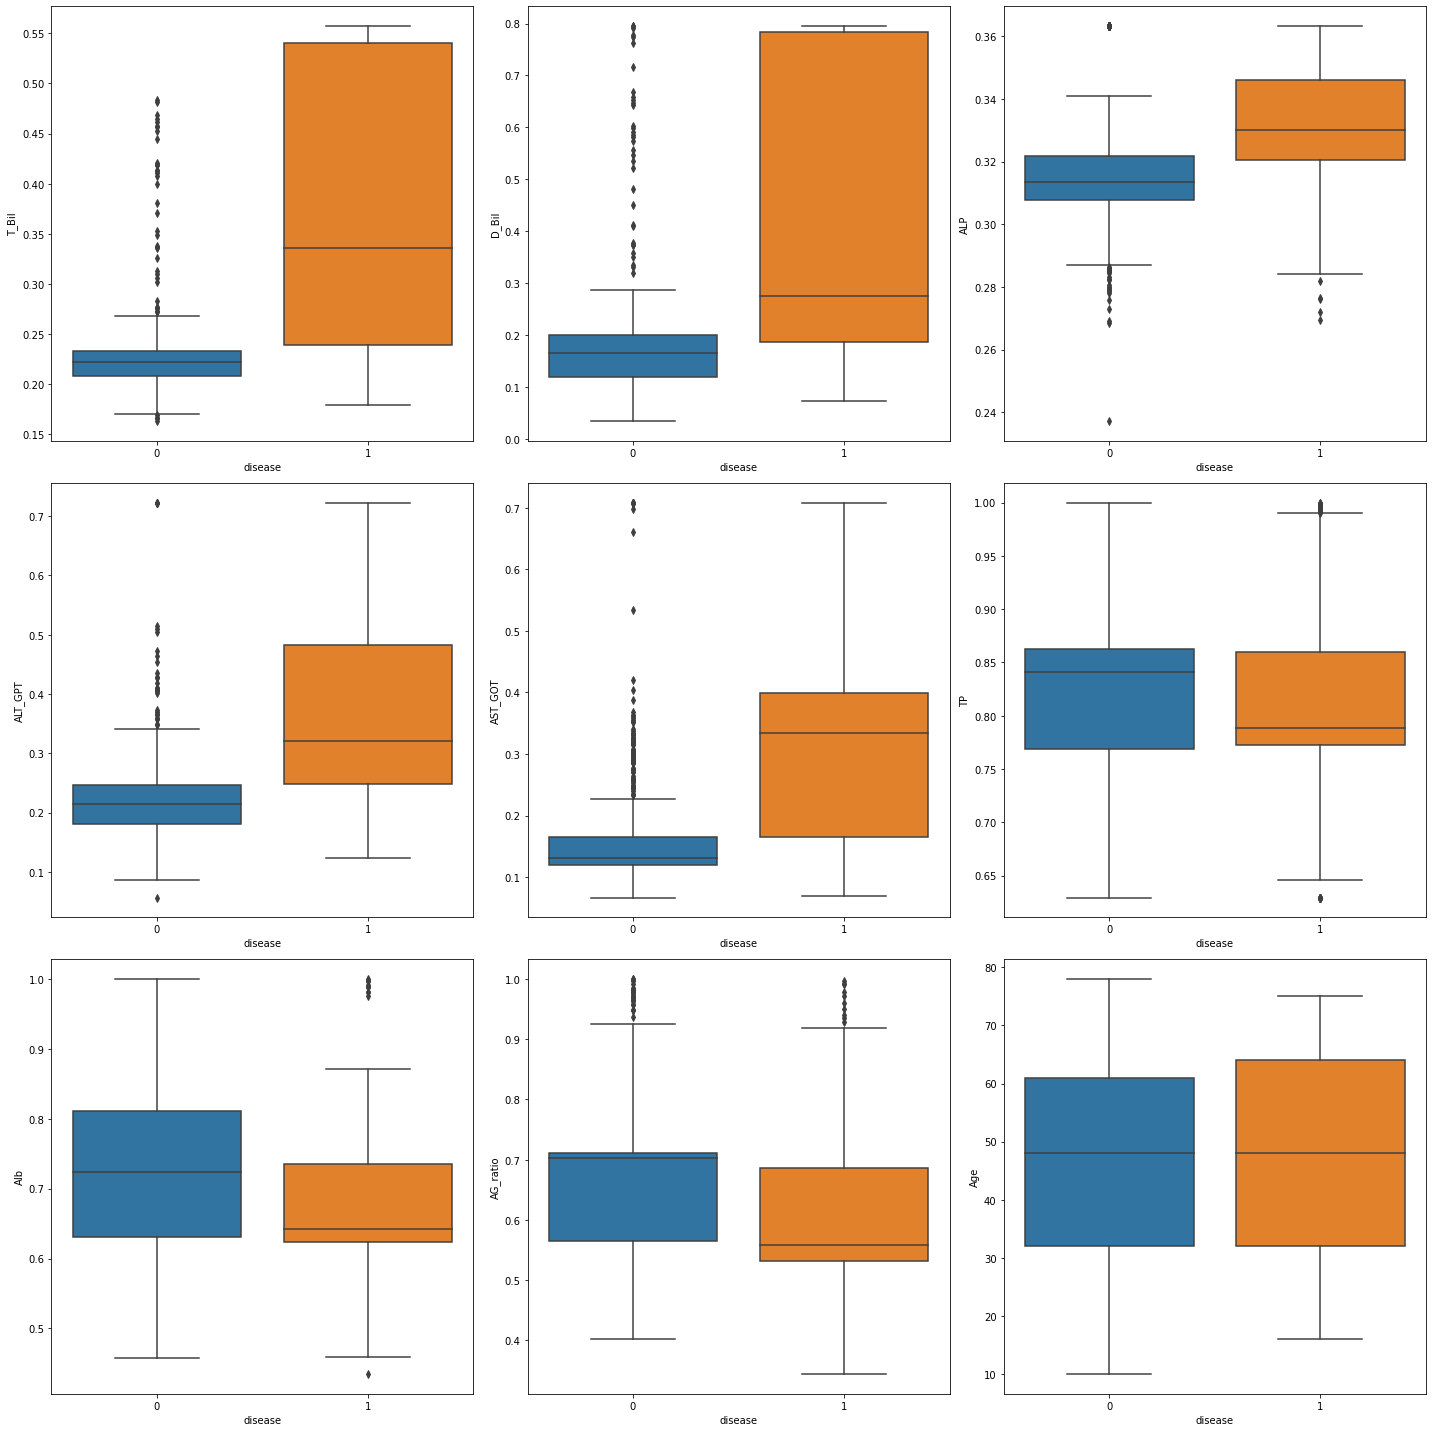

In [186]:
fig, ax = plt.subplots(3,3,figsize=(20,20))
sns.boxplot(x="disease",y="T_Bil",data=df,ax=ax[0][0])
sns.boxplot(x="disease",y="D_Bil",data=df,ax=ax[0][1])
sns.boxplot(x="disease",y="ALP",data=df,ax=ax[0][2])
sns.boxplot(x="disease",y="ALT_GPT",data=df,ax=ax[1][0])
sns.boxplot(x="disease",y="AST_GOT",data=df,ax=ax[1][1])
sns.boxplot(x="disease",y="TP",data=df,ax=ax[1][2])
sns.boxplot(x="disease",y="Alb",data=df,ax=ax[2][0])
sns.boxplot(x="disease",y="AG_ratio",data=df,ax=ax[2][1])
sns.boxplot(x="disease",y="Age",data=df,ax=ax[2][2])
plt.tight_layout()


# 各項目を２乗する

In [143]:
df_train = pd.read_csv('train.csv')
df=df_train
gemder=pd.get_dummies(df.loc[:,['Gender']])
df['Age0']=gemder.loc[:,['Gender_Female']]
df['Age1']=gemder.loc[:,['Gender_Male']]
df = df.astype({'Age0': 'int32', 'Age1': 'int32'})
df.drop(columns=['Gender'],inplace=True)

In [144]:
bai3 = 3

col='T_Bil'
std=df_desc.loc['75%',col]*bai3
#std=2
df.loc[df[col]>(std),col]=std

col='D_Bil'
std=df_desc.loc['75%',col]*bai3
#std=0.8
df.loc[df[col]>(std),col]=std

col='ALP'
std=df_desc.loc['75%',col]*bai3
df.loc[df[col]>(std),col]=std

col='ALT_GPT'
std=df_desc.loc['75%',col]*bai3
df.loc[df[col]>(std),col]=std

col='AST_GOT'
std=df_desc.loc['75%',col]*bai3
df.loc[df[col]>(std),col]=std


In [145]:
col='T_Bil'
maxval=df_desc.loc['75%',col]*bai3
df.loc[:,col]=df.loc[:,col]/maxval

col='D_Bil'
maxval=df_desc.loc['75%',col]*bai3
df.loc[:,col]=df.loc[:,col]/maxval

col='ALP'
maxval=df_desc.loc['75%',col]*bai3
df.loc[:,col]=df.loc[:,col]/maxval

col='ALT_GPT'
maxval=df_desc.loc['75%',col]*bai3
df.loc[:,col]=df.loc[:,col]/maxval

col='AST_GOT'
maxval=df_desc.loc['75%',col]*bai3
df.loc[:,col]=df.loc[:,col]/maxval

col='TP'
maxval=df_desc.loc['max',col]
df.loc[:,col]=df.loc[:,col]/maxval

col='Alb'
maxval=df_desc.loc['max',col]
df.loc[:,col]=df.loc[:,col]/maxval

col='AG_ratio'
maxval=df_desc.loc['max',col]
df.loc[:,col]=df.loc[:,col]/maxval

In [146]:
col='T_Bil'
df.loc[:,col]=df.loc[:,col]*df.loc[:,col]

col='D_Bil'
df.loc[:,col]=df.loc[:,col]*df.loc[:,col]

col='ALP'
df.loc[:,col]=df.loc[:,col]*df.loc[:,col]

col='ALT_GPT'
df.loc[:,col]=df.loc[:,col]*df.loc[:,col]

col='AST_GOT'
df.loc[:,col]=df.loc[:,col]*df.loc[:,col]

col='TP'
df.loc[:,col]=df.loc[:,col]*df.loc[:,col]

col='Alb'
df.loc[:,col]=df.loc[:,col]*df.loc[:,col]

col='AG_ratio'
df.loc[:,col]=df.loc[:,col]*df.loc[:,col]

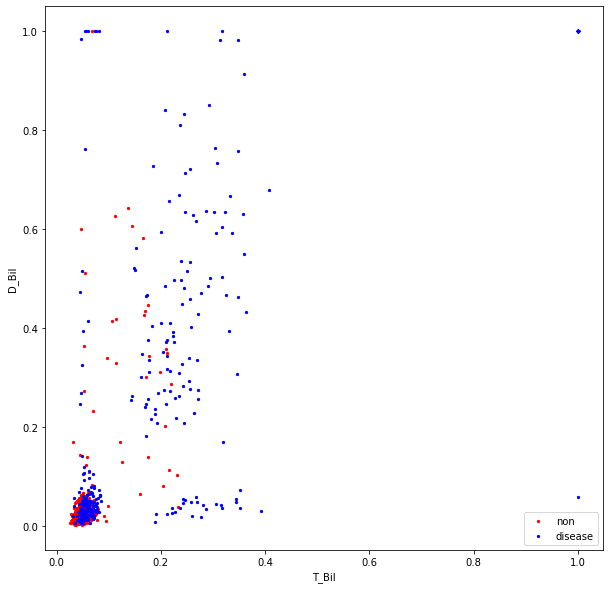

In [147]:
col1 = 'T_Bil'
col2 = 'D_Bil'
bai = 3


#棒グラフによる可視化
df_hist=df.loc[:,[col1,col2,'disease']]
n_data = np.array(df_hist.loc[df_hist['disease']==0,:])         # non
d_data = np.array(df_hist.loc[df_hist['disease']==1,:])         # disease
#n_data = n_data * n_data
#d_data = d_data * d_data

plt.figure(figsize=(10,10))

##  S ：点のサイズ
##  C ：色の指定 (r=赤、b=青、k=黒)
plt.scatter(n_data[:, 0], n_data[:, 1], s=5 ,c='r' , label="non")      
plt.scatter(d_data[:, 0], d_data[:, 1], s=5 ,c='b' , label="disease")  
plt.legend()

plt.xlabel(col1)   # X軸の名前
plt.ylabel(col2)   # Y軸の名前


plt.show()

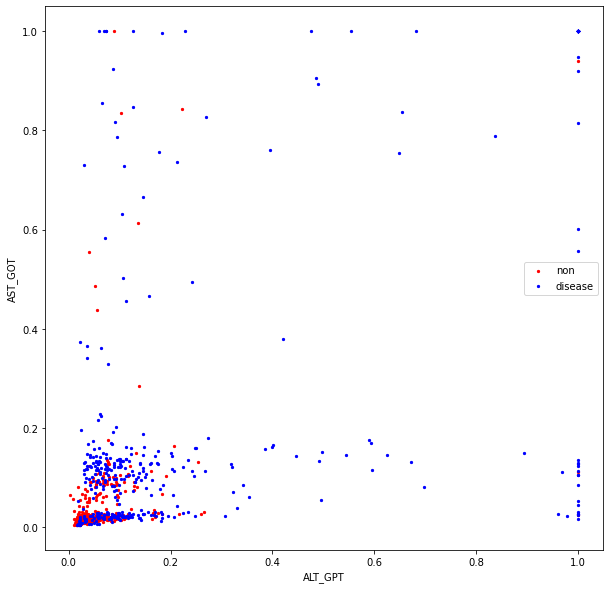

In [148]:
col1 = 'ALT_GPT'
col2 = 'AST_GOT'
bai = 3

# 結果によって分割
df_hist=df.loc[:,[col1,col2,'disease']]
n_data = np.array(df_hist.loc[df_hist['disease']==0,:])         # non
d_data = np.array(df_hist.loc[df_hist['disease']==1,:])         # disease

plt.figure(figsize=(10,10))

##  S ：点のサイズ
##  C ：色の指定 (r=赤、b=青、k=黒)
plt.scatter(n_data[:, 0], n_data[:, 1], s=5 ,c='r' , label="non")      
plt.scatter(d_data[:, 0], d_data[:, 1], s=5 ,c='b' , label="disease")  
plt.legend()

plt.xlabel(col1)   # X軸の名前
plt.ylabel(col2)   # Y軸の名前


plt.show()

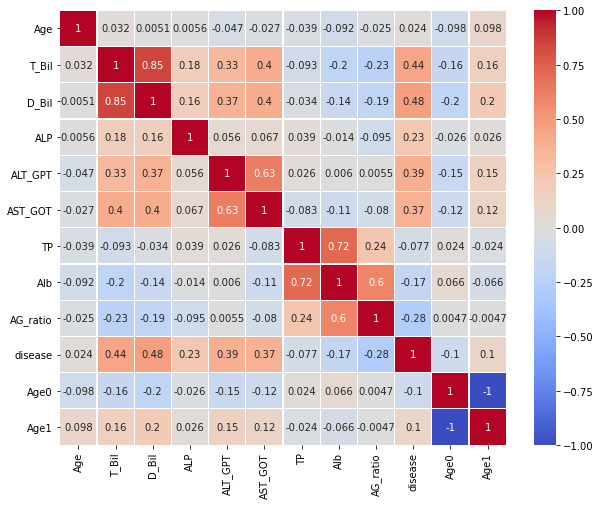

              Age       T_Bil       D_Bil         ALP     ALT_GPT     AST_GOT  \
count  850.000000  850.000000  850.000000  850.000000  850.000000  850.000000   
mean    46.610588    0.154213    0.177384    0.163863    0.148150    0.126079   
std     16.453672    0.249418    0.299134    0.186310    0.247247    0.245574   
min     10.000000    0.026637    0.001200    0.056251    0.003219    0.004438   
25%     32.000000    0.047351    0.020729    0.096639    0.038915    0.015723   
50%     48.000000    0.054167    0.037196    0.102228    0.057861    0.025514   
75%     62.000000    0.111129    0.111113    0.111111    0.111111    0.111111   
max     78.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               TP         Alb    AG_ratio     disease        Age0        Age1  
count  850.000000  850.000000  850.000000  850.000000  850.000000  850.000000  
mean     0.656788    0.504000    0.410391    0.444706    0.174118    0.825882  
std      0.155822    0.159114 

In [149]:


plt.figure(figsize=(10,8))
df_sns = df

sns.heatmap(df_sns.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
plt.show()


print(df_sns.describe())

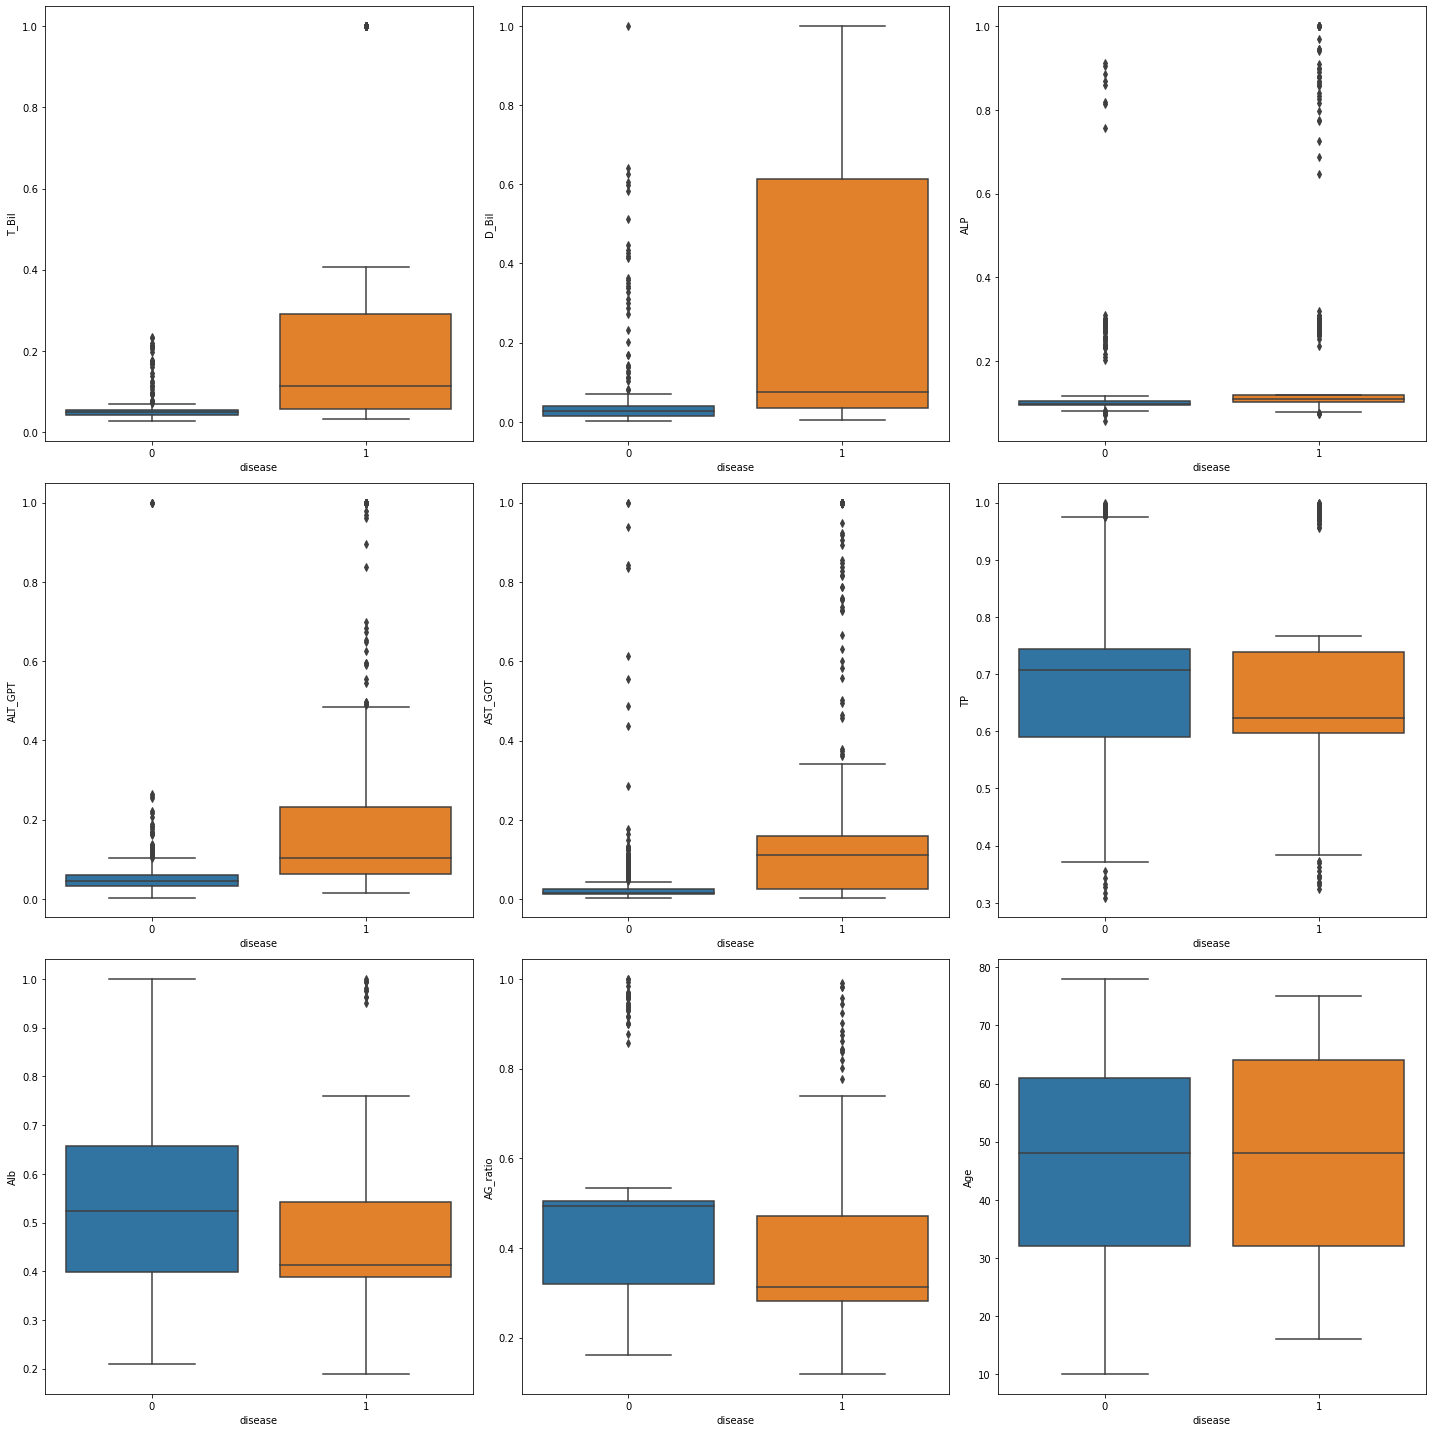

In [150]:
fig, ax = plt.subplots(3,3,figsize=(20,20))
sns.boxplot(x="disease",y="T_Bil",data=df,ax=ax[0][0])
sns.boxplot(x="disease",y="D_Bil",data=df,ax=ax[0][1])
sns.boxplot(x="disease",y="ALP",data=df,ax=ax[0][2])
sns.boxplot(x="disease",y="ALT_GPT",data=df,ax=ax[1][0])
sns.boxplot(x="disease",y="AST_GOT",data=df,ax=ax[1][1])
sns.boxplot(x="disease",y="TP",data=df,ax=ax[1][2])
sns.boxplot(x="disease",y="Alb",data=df,ax=ax[2][0])
sns.boxplot(x="disease",y="AG_ratio",data=df,ax=ax[2][1])
sns.boxplot(x="disease",y="Age",data=df,ax=ax[2][2])
plt.tight_layout()
